In [22]:
# Process CXR to obtain lung and heart diameters

import cv2
import os
import numpy as np

def process_all_subfolders(root_folder):

    diameter_dict = {}
    
    processed_images_count = 0


    for primary_subfolder in os.listdir(root_folder):
        primary_subfolder_path = os.path.join(root_folder, primary_subfolder)


        if os.path.isdir(primary_subfolder_path):

            diameter_list = []


            for sub_subfolder in os.listdir(primary_subfolder_path):
                sub_subfolder_path = os.path.join(primary_subfolder_path, sub_subfolder)


                if os.path.isdir(sub_subfolder_path):
                    heart_path = os.path.join(sub_subfolder_path, 'heart.png')
                    lung_path = os.path.join(sub_subfolder_path, 'lung.png')


                    heart_img = cv2.imread(heart_path, cv2.IMREAD_GRAYSCALE)
                    lung_img = cv2.imread(lung_path, cv2.IMREAD_GRAYSCALE)


                    try:
                        contours, _ = cv2.findContours((heart_img == 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                        biggest_heart_block = max(map(len, contours), default=0)
                    except ValueError:
                        print(f"Skipping {sub_subfolder} due to an issue with heart image contour identification.")
                        continue


                    heart_pixel_counts = np.sum((heart_img == 255), axis=1)


                    lung_pixel_counts = []


                    for row_idx in range(lung_img.shape[0]):
                        row_pixels = (lung_img[row_idx, :] == 255).astype(np.uint8)


                        if np.any(row_pixels):
                            lung_pixel_counts.append(np.sum(row_pixels))


                    if not np.any(heart_pixel_counts) or not np.any(lung_pixel_counts):
                        print(f"Skipping {sub_subfolder} due to empty heart or lung pixel counts.")
                        continue


                    heart_percentile = np.percentile(heart_pixel_counts, 95)
                    lung_percentile = np.percentile(lung_pixel_counts, 95)


                    diameter_list.append([heart_percentile, lung_percentile])
                    

                    processed_images_count += 1


                    if processed_images_count % 100 == 0:
                        print(f"Processed {processed_images_count} images in {primary_subfolder}")


            diameter_dict[primary_subfolder] = diameter_list
            print(f"Processed {primary_subfolder}.")

    return diameter_dict


root_folder = # input root folder containing lung/heart segmentations #
diameter_dict = process_all_subfolders(root_folder)


for subfolder, diameter_list in diameter_dict.items():
    print(f"{subfolder}: {diameter_list[0:5]}")


Processed 100 images in borderline
Processed 200 images in borderline
Processed 300 images in borderline
Processed 400 images in borderline
Processed 500 images in borderline
Processed 600 images in borderline
Processed 700 images in borderline
Processed 800 images in borderline
Skipping a3e591c8-73e007eb-7396fe2a-402195f1-570b2686 due to empty heart or lung pixel counts.
Processed 900 images in borderline
Processed 1000 images in borderline
Processed 1100 images in borderline
Processed 1200 images in borderline
Processed borderline.
Processed 1300 images in marked
Processed marked.
Processed massive.
Processed 1400 images in mild
Processed 1500 images in mild
Processed 1600 images in mild
Processed 1700 images in mild
Processed 1800 images in mild
Processed 1900 images in mild
Processed 2000 images in mild
Processed 2100 images in mild
Processed 2200 images in mild
Processed 2300 images in mild
Processed 2400 images in mild
Processed 2500 images in mild
Processed 2600 images in mild
P

Processed 19700 images in normal
Processed 19800 images in normal
Processed 19900 images in normal
Processed 20000 images in normal
Processed 20100 images in normal
Processed 20200 images in normal
Processed 20300 images in normal
Processed 20400 images in normal
Processed 20500 images in normal
Processed 20600 images in normal
Processed 20700 images in normal
Processed 20800 images in normal
Processed 20900 images in normal
Processed normal.
Processed possible.
Processed 21000 images in severe
Processed 21100 images in severe
Processed 21200 images in severe
Processed severe.
Processed 21300 images in significant
Processed significant.
Processed 21400 images in slightly
Processed slightly.
Processed somewhat.
Processed substantial.
Processed 21500 images in top_normal
Processed 21600 images in top_normal
Processed 21700 images in top_normal
Processed 21800 images in top_normal
Processed 21900 images in top_normal
Processed 22000 images in top_normal
Skipping 2da5004a-1ff7be2c-27ab41ce

In [23]:
# Save the diameters into a dictionary

import json


output_json_file_path = routput_json_file_path = # input path of where to save the diameters #


with open(output_json_file_path, 'w') as json_file:
    json.dump(diameter_dict, json_file)

print(f"Diameter_dict has been saved to {output_json_file_path}")


Sizes_dict has been saved to D:\all_reports_combined\cardiomegaly_mentions\descriptor_grouped_images_all\diameter.json


In [ ]:
# Regenerate diameter_ratio_dict if needed

In [1]:
import numpy as np
import json


with open(# input location of diameter_ratio_dict #, 'r') as json_file:
    diameter_dict = json.load(json_file)


diameter_ratio_dict = {}


for primary_subfolder, diameter_list in diameter_dict.items():

    filtered_diameters = [(heart_diameter, lung_diameter) for heart_diameter, lung_diameter in diameter_list if heart_diameter != 0 and lung_diameter != 0]


    diameter_ratios = []
    for heart_diameter, lung_diameter in filtered_diameters:
        try:
            ratio = heart_diameter / lung_diameter


            if ratio <= 1.0:
                diameter_ratios.append(ratio)
        except Exception as e:

            print(f"Error processing pair in {primary_subfolder}: {e}")


    lower_bound = np.percentile(diameter_ratios, 2.5)
    upper_bound = np.percentile(diameter_ratios, 97.5)
    filtered_ratios = [ratio for ratio in diameter_ratios if lower_bound <= ratio <= upper_bound]


    diameter_ratio_dict[primary_subfolder] = filtered_ratios


for subfolder, ratios_list in diameter_ratio_dict.items():
    print(f"{subfolder}: {ratios_list[0:5]}")


borderline: [0.4823685961410512, 0.570268074735987, 0.5779722079258878, 0.5423728813559322, 0.5840957072484166]
marked: [0.558412520961431, 0.7170706006322445, 0.7993690851735016, 0.6110197368421053, 0.6343167701863354]
massive: [0.8237221494102228, 0.8594563331405437, 0.7425837320574162]
mild: [0.543509965969859, 0.6610455311973018, 0.6165658445788739, 0.6120507399577167, 0.6458112407211029]
mild_to_moderate: [0.5845588235294118, 0.5793103448275863, 0.7224168126094571, 0.6122994652406417, 0.6861063464837049]
moderate: [0.6335920177383592, 0.6042356055592323, 0.5815722738799662, 0.5842763549731983, 0.6165244723843736]
moderate_to_severe: [0.7223154362416108, 0.7165644171779141, 0.7141927083333334, 0.5479693937610359, 0.6378122308354867]
normal: [0.49557522123893805, 0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
possible: [0.5451688923802043, 0.537320810677212, 0.5941023417172593]
severe: [0.7159636946075815, 0.7102869139258222, 0.706645056726094, 0.782

In [ ]:
# Add no_mentions samples to the CTR dict if needed

In [2]:

json_file = # input json path for no_mentions CTR #


with open(json_file, 'r') as file:
    data_dict = json.load(file)


diameter_ratio_dict.update(data_dict)

for subfolder, ratios_list in diameter_ratio_dict.items():
    print(f"{subfolder}: {ratios_list[0:5]}")

borderline: [0.4823685961410512, 0.570268074735987, 0.5779722079258878, 0.5423728813559322, 0.5840957072484166]
marked: [0.558412520961431, 0.7170706006322445, 0.7993690851735016, 0.6110197368421053, 0.6343167701863354]
massive: [0.8237221494102228, 0.8594563331405437, 0.7425837320574162]
mild: [0.543509965969859, 0.6610455311973018, 0.6165658445788739, 0.6120507399577167, 0.6458112407211029]
mild_to_moderate: [0.5845588235294118, 0.5793103448275863, 0.7224168126094571, 0.6122994652406417, 0.6861063464837049]
moderate: [0.6335920177383592, 0.6042356055592323, 0.5815722738799662, 0.5842763549731983, 0.6165244723843736]
moderate_to_severe: [0.7223154362416108, 0.7165644171779141, 0.7141927083333334, 0.5479693937610359, 0.6378122308354867]
normal: [0.49557522123893805, 0.4016516516516517, 0.3983050847457627, 0.4491188175099488, 0.5117616309461579]
possible: [0.5451688923802043, 0.537320810677212, 0.5941023417172593]
severe: [0.7159636946075815, 0.7102869139258222, 0.706645056726094, 0.782

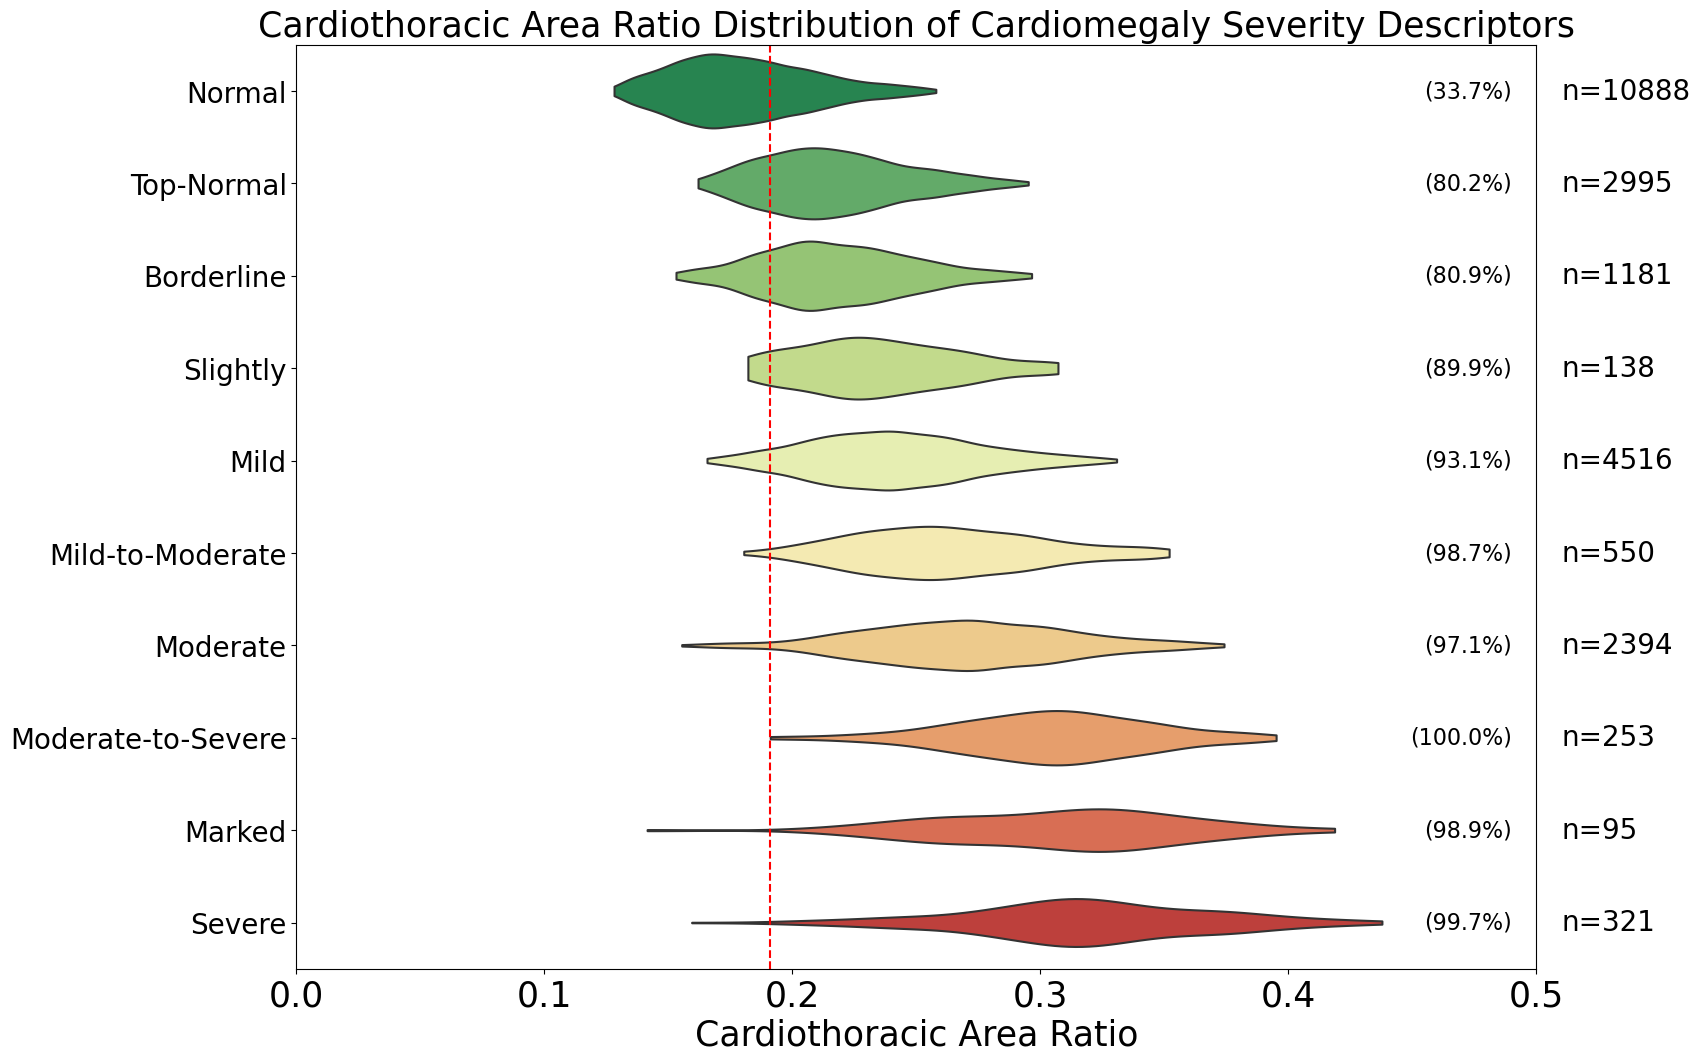

In [60]:
# Plotting the CTRs of various severity adjectives

import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


subfolders = list(volume_ratio_dict.keys())
ratios_lists = list(volume_ratio_dict.values())


filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]


medians = [sorted(ratios_list)[len(ratios_list) // 2] for ratios_list in filtered_ratios_lists]


sorted_subfolders = [subfolder for _, subfolder in sorted(zip(medians, filtered_subfolders), reverse=False)]


sorted_ratios_lists = [volume_ratio_dict[subfolder] for subfolder in sorted_subfolders]


cmap = sns.color_palette("RdYlGn_r", n_colors=len(sorted_subfolders))


fig, ax = plt.subplots(figsize=(16, 12))
sns.violinplot(data=sorted_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)


ax.set_title(r'Cardiothoracic Area Ratio Distribution of Cardiomegaly Severity Descriptors', fontsize=25)
ax.set_xlabel(r'Cardiothoracic Area Ratio',fontsize=25)
ax.set_yticklabels(sorted_subfolders)
ax.set_yticklabels(["Normal", "Top-Normal", "Borderline", "Slightly", "Mild", "Mild-to-Moderate", "Moderate", "Moderate-to-Severe", "Marked", "Severe"], fontsize=20)
ax.grid(False)
ax.axvline(x=0.191, color='red', linestyle='--')


ax.tick_params(axis='x', labelsize=25) 
ax.set_xlim(0, 0.5)


for i, (subfolder, ratios_list) in enumerate(zip(sorted_subfolders, sorted_ratios_lists)):
    ax.text(0.51, i, f'n={len(ratios_list)}', va='center', ha='left', fontsize=20)
    

for i, ratios_list in enumerate(sorted_ratios_lists):
    above_half = np.mean(np.array(ratios_list) > 0.191)
    ax.text(0.49, i, f'({above_half*100:.1f}%)', va='center', ha='right', fontsize=16)
    
    

plt.show()


In [9]:
# Normality tests for each adjective

import pandas as pd
from scipy.stats import mannwhitneyu


filtered_diameter_ratio_dict = {subfolder: diameter_ratio_dict[subfolder] for subfolder in sorted(diameter_ratio_dict.keys(), key=lambda x: np.median(diameter_ratio_dict[x])) if len(diameter_ratio_dict[subfolder]) >= 50}

for subfolder, ratios in filtered_diameter_ratio_dict.items():
    print(f"{subfolder}: Length = {len(ratios)}")


p_values = []

sorted_subfolders = list(filtered_diameter_ratio_dict.keys())  

alpha = 0.05  
m = len(sorted_subfolders) - 1  

alpha_sidak = 1 - (1 - alpha) ** (1 / m)  

comparison_results = []

for i in range(m):
    subfolder1 = sorted_subfolders[i]
    subfolder2 = sorted_subfolders[i + 1]

    ratios1 = filtered_diameter_ratio_dict[subfolder1]
    ratios2 = filtered_diameter_ratio_dict[subfolder2]


    u_statistic, p_value = mannwhitneyu(ratios1, ratios2, alternative='two-sided')


    p_value_corrected = 1 - (1 - p_value) ** m


    p_values.append(p_value_corrected)


    comparison_results.append({
        'Comparison': f"{subfolder1} vs {subfolder2}",
        'Adjusted P-Value': p_value_corrected,
        'Verdict': 'Significant' if p_value_corrected < alpha_sidak else 'Not Significant'
    })


csv_path = # input desired csv save path #
df_results = pd.DataFrame(comparison_results)
df_results.to_csv(csv_path, index=False)


print(f"P-values for all neighboring subfolder pairs (Sidak corrected alpha={alpha_sidak}):")
for result in comparison_results:
    print(f"{result['Comparison']}: p-value = {result['Adjusted P-Value']} ({result['Verdict']})")


ratios_moderate = filtered_diameter_ratio_dict.get("moderate_to_severe", [])
ratios_severe = filtered_diameter_ratio_dict.get("severe", [])

u_statistic_manual, p_value_manual = mannwhitneyu(ratios_moderate, ratios_severe, alternative='two-sided')


verdict_manual = 'Significant' if p_value_manual < alpha else 'Not Significant'
print(f"Manually added test between moderate_to_severe and severe: p-value = {p_value_manual} ({verdict_manual})")


normal: Length = 10883
top_normal: Length = 2992
borderline: Length = 1180
slightly: Length = 138
mild: Length = 4513
mild_to_moderate: Length = 550
moderate: Length = 2392
moderate_to_severe: Length = 253
marked: Length = 95
severe: Length = 320
P-values for all neighboring subfolder pairs (Sidak corrected alpha=0.005683044988048058):
normal vs top_normal: p-value = 0.0 (Significant)
top_normal vs borderline: p-value = 0.7589879790611882 (Not Significant)
borderline vs slightly: p-value = 1.9939827566872736e-08 (Significant)
slightly vs mild: p-value = 0.3599318017187275 (Not Significant)
mild vs mild_to_moderate: p-value = 0.0 (Significant)
mild_to_moderate vs moderate: p-value = 0.0003501882876693063 (Significant)
moderate vs moderate_to_severe: p-value = 0.0 (Significant)
moderate_to_severe vs marked: p-value = 0.2189368624475595 (Not Significant)
marked vs severe: p-value = 0.9680043053830837 (Not Significant)
Manually added test between moderate_to_severe and severe: p-value = 5.

In [124]:
# Determining severity thresholds

import numpy as np
from scipy.stats import ttest_ind

def calculate_thresholds(ratios_lists):
    thresholds = []
    previous_group = None


    for value in np.arange(0.42, 1.01, 0.01):
        max_p_value = 0
        max_p_group = None


        for i, sublist in enumerate(ratios_lists):
            _, p_value = ttest_ind(sublist, [value])


            if p_value > max_p_value:
                max_p_value = p_value
                max_p_group = i


        if max_p_group != previous_group:

            rounded_threshold = round(value, 2)
            thresholds.append(rounded_threshold)
            previous_group = max_p_group

    return thresholds


new_thresholds = calculate_thresholds(sorted_grouped_ratios_lists)


print("New Thresholds:", new_thresholds)


New Thresholds: [0.42, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7]


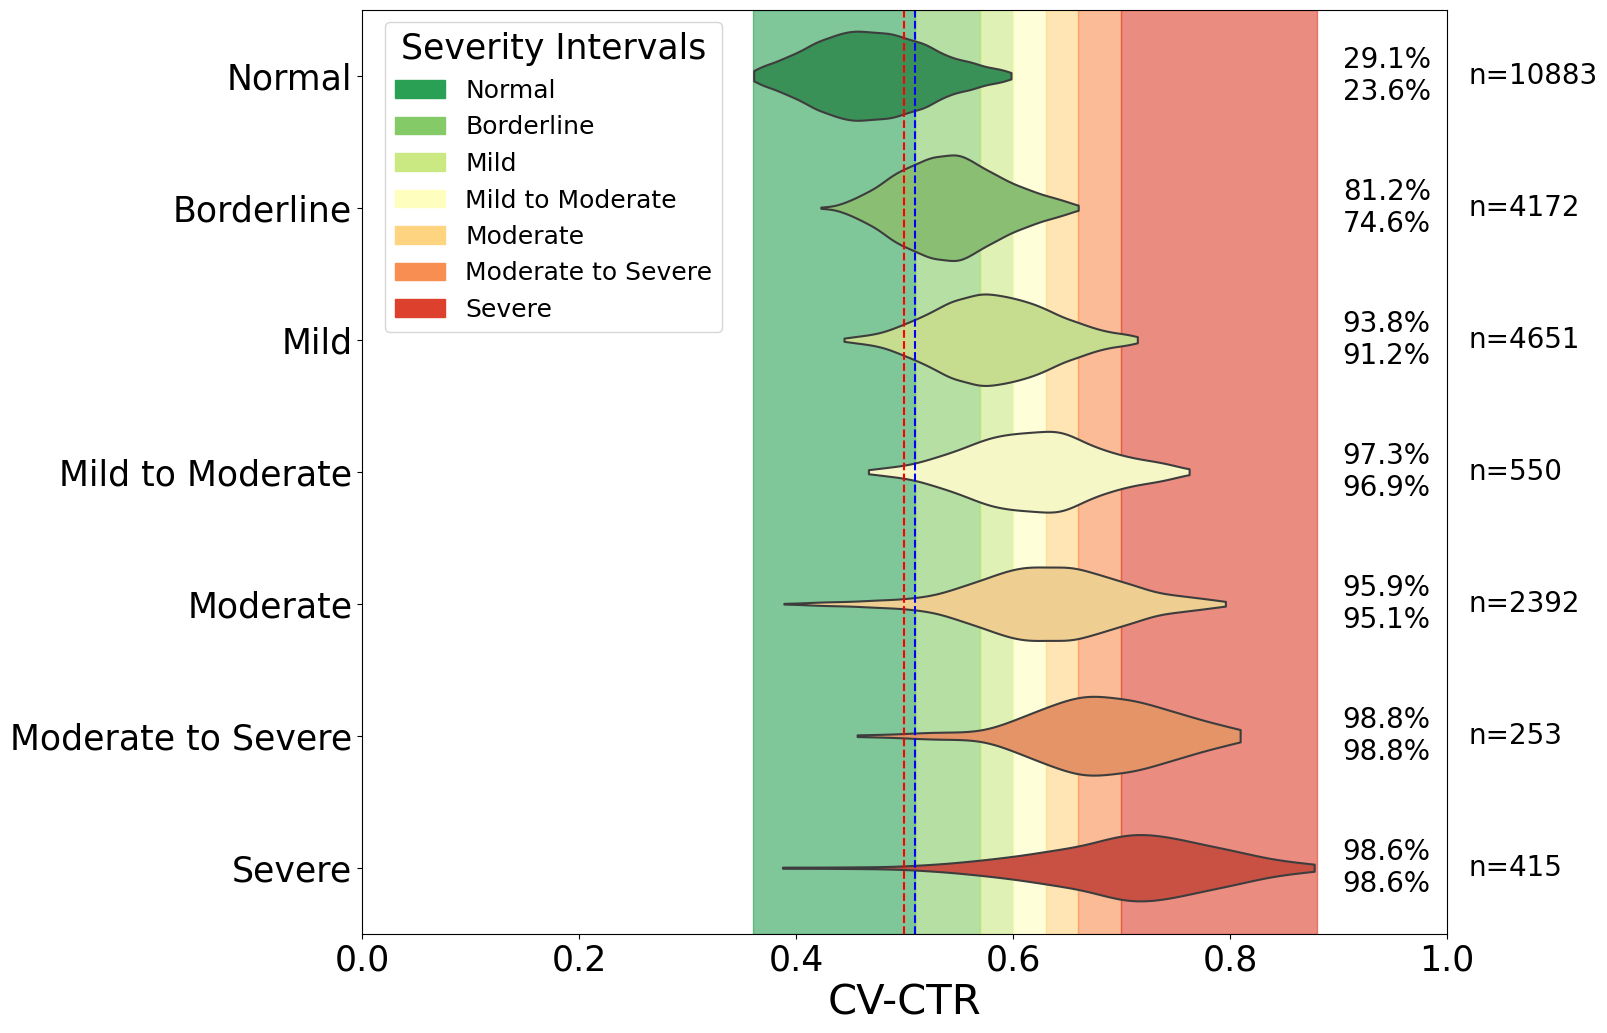

In [2]:
# Plotting severities with thresholds

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch


severity_groups = {
    'Normal': ['normal'],
    'Borderline': ['top_normal', 'borderline'],
    'Mild': ['slightly', 'mild'],
    'Mild to Moderate': ['mild_to_moderate'],
    'Moderate': ['moderate'],
    'Moderate to Severe': ['moderate_to_severe'],
    'Severe': ['marked', 'severe']
}


subfolders = list(diameter_ratio_dict.keys())
ratios_lists = list(diameter_ratio_dict.values())


filtered_subfolders = [subfolder for subfolder, ratios_list in zip(subfolders, ratios_lists) if len(ratios_list) > 50]
filtered_ratios_lists = [ratios_list for ratios_list in ratios_lists if len(ratios_list) > 50]


grouped_subfolders = []
grouped_ratios_lists = []

for severity, subfolders_in_group in severity_groups.items():
    group_subfolders = [subfolder for subfolder in filtered_subfolders if subfolder in subfolders_in_group]
    group_ratios_lists = [ratios_list for subfolder, ratios_list in zip(filtered_subfolders, filtered_ratios_lists) if subfolder in subfolders_in_group]
    
    grouped_subfolders.append(', '.join(group_subfolders))
    grouped_ratios_lists.append(np.concatenate(group_ratios_lists).tolist())


sorted_indices = np.argsort([np.median(ratios_list) for ratios_list in grouped_ratios_lists])
sorted_grouped_subfolders = [grouped_subfolders[i] for i in sorted_indices]
sorted_grouped_ratios_lists = [grouped_ratios_lists[i] for i in sorted_indices]


n_colors = len(sorted_grouped_subfolders)
custom_colors = sns.color_palette("RdYlGn", n_colors)


cmap = sns.color_palette(custom_colors[::-1])


fig, ax = plt.subplots(figsize=(14, 12))
sns.violinplot(data=sorted_grouped_ratios_lists, ax=ax, cut=0, inner=None, orient="h", palette=cmap)


ax.set_xlabel('CV-CTR', fontsize=30)
ax.set_yticklabels(list(list(severity_groups.keys())), fontsize=25)
ax.grid(False)
ax.axvline(x=0.5, color='red', linestyle='--')
ax.axvline(x=0.51, color='blue', linestyle='--')


ax.tick_params(axis='x', labelsize=25) 
ax.set_xlim(0, 1)


for i, (subfolders_in_group, ratios_list) in enumerate(zip(sorted_grouped_subfolders, sorted_grouped_ratios_lists)):
    ax.text(1.02, i, f'n={len(ratios_list)}', va='center', ha='left', fontsize=20)


thresholds = [0.36, 0.51, 0.57, 0.6, 0.63, 0.66, 0.7, 0.88]
colors = sns.color_palette(custom_colors[::-1])

for i, threshold in enumerate(thresholds):
    if threshold < 0.88:
        ax.axvspan(threshold, thresholds[i+1], color=colors[i], alpha=0.6, zorder=-1)


legend_elements = [Patch(color=colors[i], label=group) for i, group in enumerate(list(severity_groups.keys()))]  


legend = ax.legend(handles=legend_elements, title="Severity Intervals", bbox_to_anchor=(0.01, 1), loc='upper left', fontsize=18)


legend.get_title().set_fontsize(25)


for i, ratios_list in enumerate(grouped_ratios_lists):
    above_half = np.mean(np.array(ratios_list) > 0.5)
    above_normal = np.mean(np.array(ratios_list) > 0.51)
    ax.text(0.985, i, f'{above_half*100:.1f}%\n{above_normal*100:.1f}%', va='center', ha='right', fontsize=20)


# Show the plot
plt.show()


AUC: 0.9467


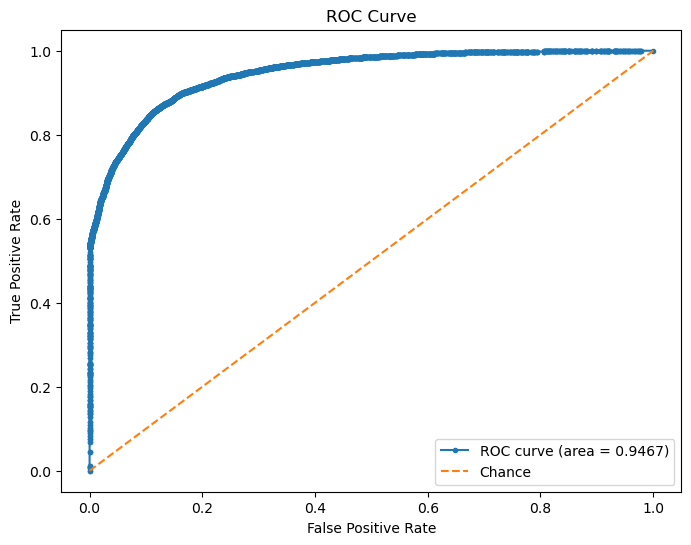

In [4]:
# ROC

import numpy as np
from sklearn.metrics import roc_auc_score


true_labels = []
predicted_scores = []


for severity, subfolders in severity_groups.items():
    if severity == 'Borderline':
        continue  
    for subfolder in subfolders:
        if subfolder in diameter_ratio_dict:
            ratios = diameter_ratio_dict[subfolder]
            true_labels.extend([0 if severity == 'Normal' else 1 for _ in ratios])
            predicted_scores.extend(ratios)


true_labels = np.array(true_labels)
predicted_scores = np.array(predicted_scores)


auc = roc_auc_score(true_labels, predicted_scores)

print(f'AUC: {auc:.4f}')


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(true_labels, predicted_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC curve (area = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


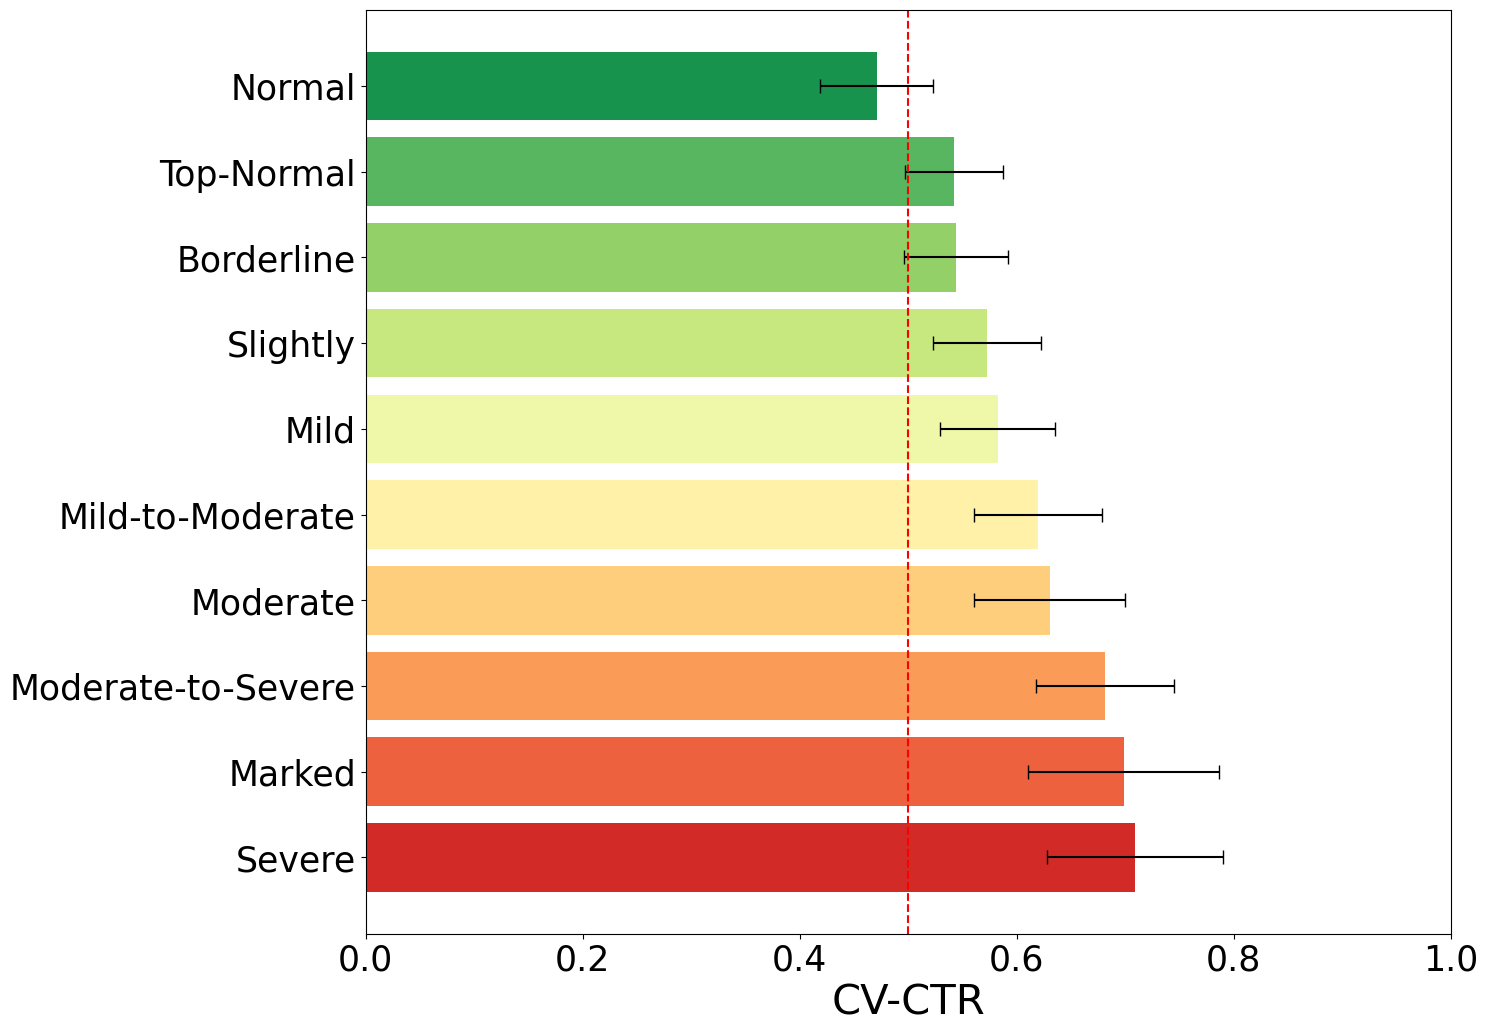

In [14]:
# Plotting mean and standard deviation

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


group_means = [np.mean(ratios_list) for ratios_list in sorted_ratios_lists]
group_stds = [np.std(ratios_list) for ratios_list in sorted_ratios_lists]


group_means.reverse()
group_stds.reverse()


custom_colors = sns.color_palette("RdYlGn", n_colors=len(group_means))
custom_labels = ["Normal", "Top-Normal", "Borderline", "Slightly", "Mild", "Mild-to-Moderate", "Moderate", "Moderate-to-Severe", "Marked", "Severe"][::-1]


plt.figure(figsize=(14, 12))
plt.barh(range(len(group_means)), group_means, xerr=group_stds, color=custom_colors, capsize=5)
plt.yticks(range(len(sorted_subfolders)), custom_labels, fontsize=25)
plt.xlabel('Mean Diameter Ratio', fontsize=14)
plt.xlim(0, 1)
plt.xticks(fontsize=25)
plt.xlabel('CV-CTR', fontsize=30)

plt.axvline(x=0.5, color='red', linestyle='--')


plt.show()
